# Pandas and SQL Queries

## Retrieve table information from an sqlite3 database

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()
query = "PRAGMA TABLE_INFO(sqlite_master)"
result = cursor.execute(query).fetchone()
pd.read_sql_query(query, conn)


,cid,name,type,notnull,dflt_value,pk
0,0,type,text,0,None,0
1,1,name,text,0,None,0
2,2,tbl_name,text,0,None,0
3,3,rootpage,int,0,None,0
4,4,sql,text,0,None,0


In [18]:
q = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


## Display the first five rows from the 'facts' table

In [19]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Display min and max for population and population_growth

In [8]:
q3 = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(q3, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [9]:
q3 = "select name from facts where population = (select min(population) from facts)"
pd.read_sql_query(q3, conn)

,name
0,Antarctica


In [10]:
q3 = "select name from facts where population = (select max(population) from facts)"
pd.read_sql_query(q3, conn)

,name
0,World


We can notice that the maximum population corresponds to the entire world which is not a country. We can also notice that the minimum value corresponds to the Antarctica continent.

## Histograms representation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ce304fda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1cda957710>]], dtype=object)

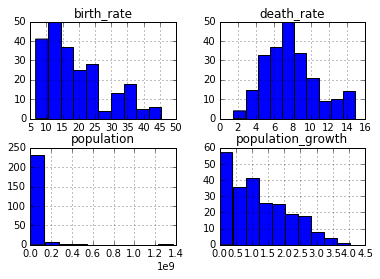

In [11]:
q3 = "select population, population_growth, birth_rate, death_rate from facts where (population != 7256490011 and population != 0)"
df = pd.read_sql_query(q3, conn)
df.hist()

## Which countries have the highest population density?

In [12]:
q = 'select name, max(population / area_land) as density from facts'
pd.read_sql_query(q, conn)

,name,density
0,Macau,21168


## Generate a histogram of population densities

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cda87d908>]], dtype=object)

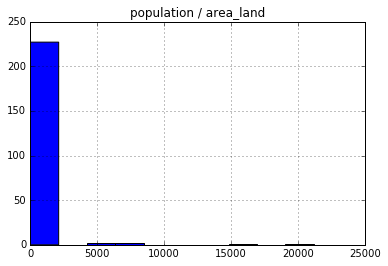

In [14]:
q = 'select name, population / area_land from facts'
df = pd.read_sql_query(q, conn)
df.hist()

## Which countries have the highest ratios of water to land?

In [16]:
q = 'select name, max(area_water/area_land) as density from facts'
pd.read_sql_query(q, conn)

,name,density
0,British Indian Ocean Territory,905


## Which countries have more water than land?

In [17]:
q = 'select name as density from facts where area_water > area_land'
pd.read_sql_query(q, conn)

,density
0,British Indian Ocean Territory
1,Virgin Islands
